In [1]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [2]:
file_path1 = "./data/author-quote.txt"
file_path2 = "./data/quotes_all.csv"
file_path3 = "./data/crowdtruth_proverbs.pickle"

In [3]:
quotes1 = list(set(dp.load_data(file_path1, header=False, sep='\t')[1].values))
print(len(quotes1))
print(quotes1[:2])

36159
['We have to do the impossible, but it is possible.', "Don't limit a child to your own learning, for he was born in another time."]


In [4]:
quotes2 = list(set(dp.load_data(file_path2, header=True, sep=';')["QUOTE"]))
print(len(quotes2))
print(quotes2[:2])

61071
["Don't limit a child to your own learning, for he was born in another time.", 'I am lucky to have advisers whom I trust.']


In [5]:
with open(file_path3, 'rb') as pickleFile:
    quotes3 = pickle.load(pickleFile)
    quotes3 = list(set(quotes3))
print(len(quotes3))
print(quotes3[:2])

1019
['Long Absent, Soon Forgotten', 'Never Do Things By Halves']


In [6]:
quotes = quotes1
quotes.extend(quotes2)
quotes.extend(quotes3)
quotes = list(set(quotes))
print(len(quotes))
print(quotes[:2])

90019
["Don't limit a child to your own learning, for he was born in another time.", 'Racism, xenophobia and unfair discrimination have spawned slavery, when human beings have bought and sold and owned and branded fellow human beings as if they were so many beasts of burden.']


In [7]:
unique_chars = dp.get_unique_chars(quotes)
print(len(unique_chars))
print(unique_chars)

88
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', 'Â', 'â', '”', '€', '™']


In [8]:
dp.get_char_presence(quotes)

Number of sentences containing each char is,
{' ': 90019, '!': 1452, '"': 8, '#': 5, '$': 148, '%': 101, '&': 62, "'": 37355, '(': 133, ')': 139, '*': 4, '+': 5, ',': 54194, '-': 11056, '.': 87913, '/': 126, '0': 2245, '1': 2197, '2': 1303, '3': 792, '4': 678, '5': 941, '6': 618, '7': 499, '8': 586, '9': 896, ':': 2481, ';': 2040, '=': 7, '?': 2919, 'A': 15365, 'B': 8410, 'C': 5887, 'D': 4033, 'E': 4650, 'F': 4530, 'G': 4981, 'H': 5544, 'I': 47185, 'J': 2109, 'K': 1159, 'L': 4417, 'M': 8826, 'N': 5000, 'O': 4642, 'P': 5103, 'Q': 212, 'R': 2867, 'S': 9180, 'T': 23280, 'U': 1728, 'V': 1215, 'W': 13138, 'X': 78, 'Y': 5268, 'Z': 137, 'a': 88790, 'b': 64007, 'c': 74702, 'd': 81209, 'e': 89750, 'f': 72721, 'g': 72782, 'h': 85573, 'i': 88186, 'j': 11766, 'k': 47145, 'l': 83349, 'm': 77446, 'n': 88486, 'o': 89115, 'p': 65696, 'q': 5608, 'r': 87411, 's': 88140, 't': 89013, 'u': 79087, 'v': 59699, 'w': 70813, 'x': 11654, 'y': 75113, 'z': 5700, '£': 4, 'Â': 4, 'â': 1, '”': 1, '€': 1, '™': 1}


In [9]:
print("Total number of quotes = ", len(quotes))
filter_quotes = dp.filter_data(quotes, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_quotes))
print(filter_quotes[:10])

Total number of quotes =  90019
83449
["Don't limit a child to your own learning, for he was born in another time.", 'Racism, xenophobia and unfair discrimination have spawned slavery, when human beings have bought and sold and owned and branded fellow human beings as if they were so many beasts of burden.', 'I am lucky to have advisers whom I trust.', "It took me so many years to move out. I'm definitely a bit of a Peter Pan, reluctant to grow up. It all seemed really nice at home-why change it? Part of me would prefer not to have any responsibility whatsoever.", "There was a sense that there was a lot of word of mouth happening with 'The Memory Keeper's Daughter,' even in hardcover.", "My father opened a restaurant. It's so amazing... it's so freaking delicious, but I'm telling you I gain five pounds every time I go in there.", 'Men take only their needs into consideration - never their abilities.', "He that does good for good's sake seeks neither paradise nor reward, but he is sure 

In [35]:
pad_chars = [' ', '!', '"', '*', ',', '-', ':', '?']
clean_quotes = dp.clean_data(quotes, "^[a-zA-Z !\"'*,\-.:?]+$", pad_chars)

unique_chars = dp.get_unique_chars(clean_quotes)
print(len(unique_chars))
print(unique_chars)

clean_quotes = dp.tokenize(clean_quotes)

print(len(clean_quotes))
print(clean_quotes[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_quotes)

36
[' ', '!', '"', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
83449
[["don't", 'limit', 'a', 'child', 'to', 'your', 'own', 'learning', ',', 'for', 'he', 'was', 'born', 'in', 'another', 'time', '.'], ['racism', ',', 'xenophobia', 'and', 'unfair', 'discrimination', 'have', 'spawned', 'slavery', ',', 'when', 'human', 'beings', 'have', 'bought', 'and', 'sold', 'and', 'owned', 'and', 'branded', 'fellow', 'human', 'beings', 'as', 'if', 'they', 'were', 'so', 'many', 'beasts', 'of', 'burden', '.']]
min of length:  2
max of length:  108
average length:  27.517166173351388
mode of length:  14


In [36]:
MIN_NUM_TOKENS = 6
MAX_NUM_TOKENS = 60
clean_quotes = dp.filter_data_on_length(clean_quotes, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_quotes))

80036


In [37]:
word_freqs = dp.get_vocabulary(clean_quotes)

In [38]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  34977
average of frequency:  60.49644051805472
mode of frequency:  1


In [39]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_quotes, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  5299
29198
[["don't", 'limit', 'a', 'child', 'to', 'your', 'own', 'learning', ',', 'for', 'he', 'was', 'born', 'in', 'another', 'time', '.'], ['men', 'take', 'only', 'their', 'needs', 'into', 'consideration', '-', 'never', 'their', 'abilities', '.'], ['to', 'walk', 'around', 'with', 'an', 'ego', 'is', 'a', 'bad', 'thing', '.', 'to', 'have', 'confidence', 'in', 'yourself', 'is', 'a', 'great', 'thing', '.'], ['an', 'ill', 'wound', 'is', 'cured', ',', 'not', 'an', 'ill', 'name'], ["i'm", 'so', 'happy', 'to', 'be', 'able', 'to', 'give', 'kids', 'the', 'opportunity', 'to', 'learn', 'about', 'amazing', 'world', 'of', 'dance', 'and', 'music', 'that', "i've", 'have', 'been', 'lucky', 'enough', 'to', 'make', 'such', 'a', 'big', 'part', 'of', 'my', 'own', 'life', '.']]


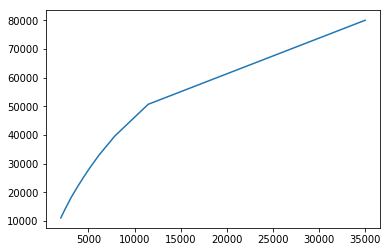

In [40]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_quotes, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [41]:
# Considering only words which have a frequency of atleast 15 and the corresponding sentences
final_vocabulary = dp.filter_words(word_freqs, 9)
print("Number of filtered words = ", len(final_vocabulary))
final_clean_quotes = dp.get_sentences_with_words(clean_quotes, final_vocabulary)
print("Number of sentences: ", len(final_clean_quotes))

Number of filtered words =  8961
Number of sentences:  43383


In [42]:
# Let's append sos and eos tokens to all sentences
clean_quotes_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_quotes]
clean_quotes_final = [' '.join(tokens) for tokens in clean_quotes_final]
vocabulary_final = dp.filter_words(dp.get_vocabulary(dp.tokenize(clean_quotes_final)), 0)
print("Final vocabulary size: ", len(vocabulary_final))
print("Number of sentences: ", len(clean_quotes_final))
print(clean_quotes_final[:2])
print(vocabulary_final[:10])

Final vocabulary size:  8916
Number of sentences:  43383
["sos don't limit a child to your own learning , for he was born in another time . eos", "sos it took me so many years to move out . i'm definitely a bit of a peter pan , reluctant to grow up . it all seemed really nice at home - why change it ? part of me would prefer not to have any responsibility whatsoever . eos"]
['sos', "don't", 'limit', 'a', 'child', 'to', 'your', 'own', 'learning', ',']


In [43]:
with open("./datasets/quotes.pickle","wb") as fop:
    pickle.dump(clean_quotes_final, fop)
    
with open("./datasets/quotes_vocabulary.pickle","wb") as fop:
    pickle.dump(vocabulary_final, fop)

In [44]:
print(clean_quotes_final[:15])

["sos don't limit a child to your own learning , for he was born in another time . eos", "sos it took me so many years to move out . i'm definitely a bit of a peter pan , reluctant to grow up . it all seemed really nice at home - why change it ? part of me would prefer not to have any responsibility whatsoever . eos", 'sos men take only their needs into consideration - never their abilities . eos', 'sos to walk around with an ego is a bad thing . to have confidence in yourself is a great thing . eos', 'sos an ill wound is cured , not an ill name eos', 'sos i try to become more humble and more myself with every year . there was a while when i got famous where i was so confused and my head was spinning . eos', "sos i think the industry finally gets it . they've lost the connection with the american public , and they've got to rebuild the trust with the american public . eos", "sos i'm so happy to be able to give kids the opportunity to learn about amazing world of dance and music that i'